In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score

In [2]:
iris = load_iris()
#Extraer los datos (medidas de las flores)
iris_data = iris.data

# Mostramos tabla con los datos
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Establecemos correlación entre número de etiqueta y nombre de columnas
iris_data_pd



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Aplicamos K-Means (para comparar luego)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(iris_data_pd.iloc[:, 0:4])

In [4]:
# n_init=10 -> Se ejecuta 10 veces (centroides inicializados en posiciones diferentes) y devuelve el resultado con menor inercia
kmeans = KMeans(n_clusters=3, n_init=10, random_state=123)
kmeans.fit(datos_normalizados) # Utilizamos solo 2 dimensiones (longitud del pétalo - 2, ancho pétalo - 3)

labels = kmeans.labels_ # Etiquetas
centroids = kmeans.cluster_centers_ # Centros (finales) de los clusters

In [5]:
# Añadimos las etiquetas predichas al dataset
iris_data_pd['cluster_kmeans'] = labels
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_kmeans
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


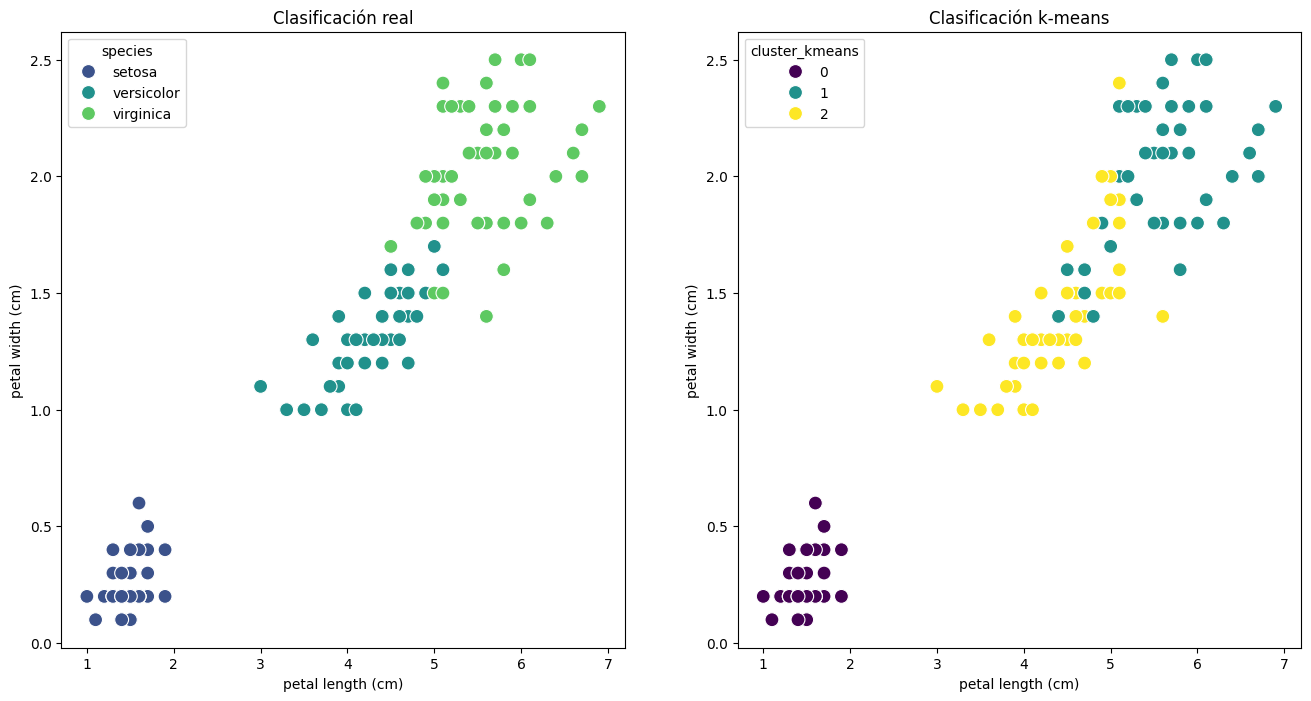

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=100)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por k-means
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='cluster_kmeans', ax=axes[1], palette='viridis', s=100)
axes[1].set_title('Clasificación k-means')
# axes[1].scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label="Centroides")

plt.show()

In [7]:
# Matríz de confusión
contingency_matrix = pd.crosstab(iris.target, labels, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                  0  50   0
1                 11   0  39
2                 36   0  14


In [8]:
# Compara qué tan similares son dos agrupaciones. 1.0 es una coincidencia perfecta.
ari = adjusted_rand_score(iris.target, labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.6201


In [22]:
# Mapeando los clusters generados por kmeans para que coincidan con las observaciones
y_pred_mapped = np.copy(labels)
y_pred_mapped[labels==1] = 0
y_pred_mapped[labels==0] = 2
y_pred_mapped[labels==2] = 1

contingency_matrix = pd.crosstab(iris.target, y_pred_mapped, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                 50   0   0
1                  0  39  11
2                  0  14  36


In [23]:
accuracy = accuracy_score(iris.target, y_pred_mapped)
print(f"Precisión (mapeando etiquetas): {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisión (mapeando etiquetas): 0.8333 (83.33%)


## Aplicamos Gaussian Mixture


In [11]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

gmm = GaussianMixture(n_components=3, random_state=123).fit(datos_normalizados)
labels_em = gmm.predict(datos_normalizados)

In [12]:
iris_data_pd['cluster_em'] = labels_em

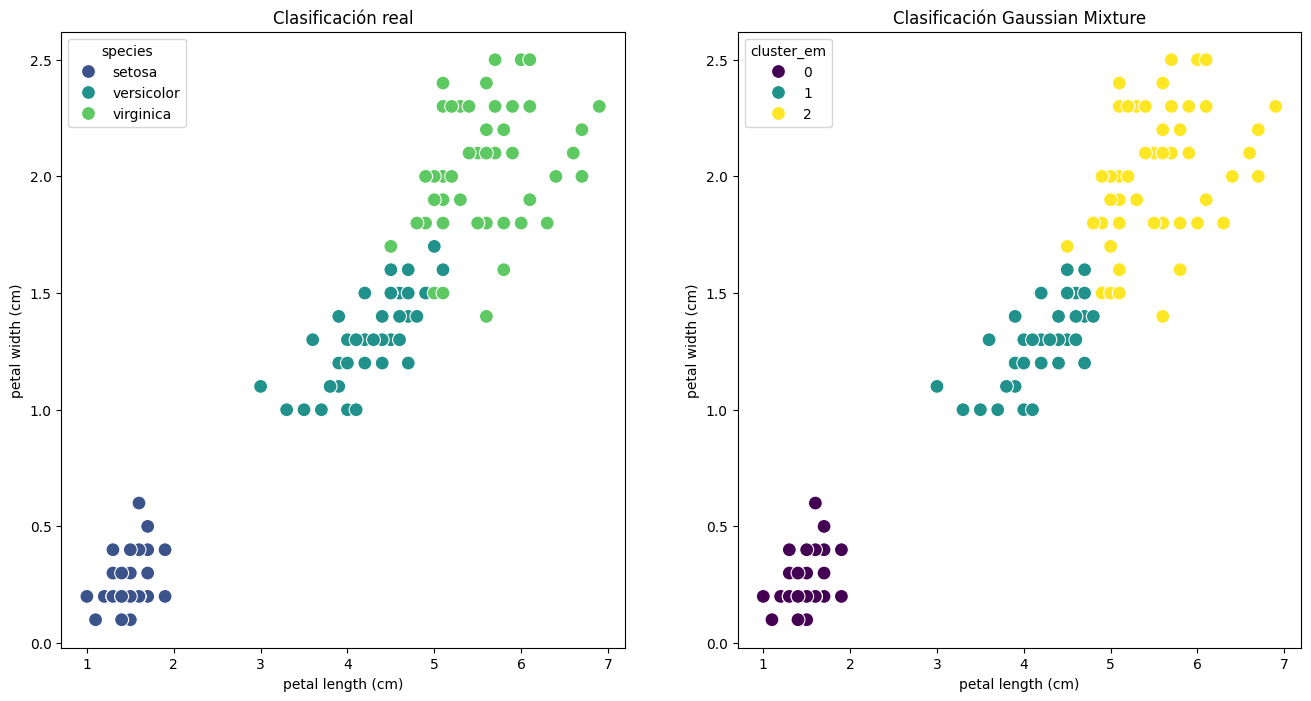

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=100)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por k-means
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='cluster_em', ax=axes[1], palette='viridis', s=100)
axes[1].set_title('Clasificación Gaussian Mixture')

plt.show()

In [24]:
contingency_matrix = pd.crosstab(iris.target, labels_em, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                  0  50   0
1                  5   0  45
2                 50   0   0


In [25]:
y_pred_mapped_em = np.copy(labels_em)
y_pred_mapped_em[labels_em==1] = 0
y_pred_mapped_em[labels_em==0] = 2
y_pred_mapped_em[labels_em==2] = 1

contingency_matrix = pd.crosstab(iris.target, y_pred_mapped_em, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                 50   0   0
1                  0  45   5
2                  0   0  50


In [16]:
ari = adjusted_rand_score(iris.target, labels_em)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.9039


In [26]:
accuracy = accuracy_score(iris.target, y_pred_mapped_em)
print(f"Precisión (mapeando etiquetas): {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisión (mapeando etiquetas): 0.9667 (96.67%)


## Analizamos probabilidades de los puntos discordantes

In [18]:
# Extract misclassified points where the predicted label does not match the true label

iris_data_pd['cluster_kmeans'] = y_pred_mapped
iris_data_pd['cluster_em'] = y_pred_mapped_em
misclassified_points_em = iris_data_pd[iris.target != y_pred_mapped_em]

print("\nData points misclassified by Gaussian Mixture Model:")
display(misclassified_points_em)


Data points misclassified by Gaussian Mixture Model:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_kmeans,cluster_em
68,6.2,2.2,4.5,1.5,versicolor,2,2
70,5.9,3.2,4.8,1.8,versicolor,1,2
72,6.3,2.5,4.9,1.5,versicolor,2,2
77,6.7,3.0,5.0,1.7,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,2,2


In [19]:
np.round(gmm.predict_proba(misclassified_points_em.iloc[:, 0:4]), 3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])